In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt				    score.csv
 매수종목2.txt				    sonar.csv
'2. 영화평점, 날짜별 영화평점 시각화.zip'  'stock-data (1).csv'
 atlas-higgs-challenge-2014-v2.csv.gz	    stock-data.csv
 auto-mpg.csv				   'stock price.xlsx'
 bmi_500.csv				    stock_px.csv
 cosmetics_.csv				   'stock valuation.xlsx'
 cosmetics_.xlsx			    test.csv
 creative_commons_elephant.jpg		    test.db.db
 매수종목.csv				    test.txt
 database				    ThoraricSurgery.csv
 data_studentlist_en.csv		    titanic_test.csv
 demo.docx				    titanic_train.csv
 example.docx				    titanic.xls
 heart_disease.csv			    titanic.xlsx
 height_weight.txt			    Titanic배포용.zip
 HelloWorld.xlsx			    tmdb_5000_credits.csv
 house_price.csv			    tmdb_5000_movies.csv
 머신러닝_모델_협업_개발_프로세스.jpg	    Traffic_Accident_2017.csv
 lenna.png				    train.csv
 little-char.png			    user_id_mean.csv
 ml-latest-small.zip			   'wine(1).csv'
 population_number.csv			    wine.csv
 ram_price.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [54]:
df = pd.read_csv(drive_path + 'wine_train.csv').iloc[:, 1:]

df = pd.get_dummies(df, columns = ['type'])
df


# 2가지로 나누자. red와 white를 따로 다루고, y를 quality로 두는거야.
# red = df[df['type'] == 'red'].iloc[:, :-1]
# white = df[df['type'] == 'white'].iloc[:, :-1]
# display(red.head())
# display(white.head())
# display(df.iloc[:, :-1])

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0,1
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0,1
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0,1
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0,1


In [28]:
df = df.iloc[:, : -1]
df.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9


In [ ]:
# white_3 = white[(3 < white['quality']) & (white['quality'] < 9)]
# white_3

In [29]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [30]:
df_new = mean_norm(df)
df_new

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.941034,-1.250498,2.186178,-1.781778,0.286319,-0.398463,-1.211827,-0.560801,-0.117242,1.372003,-0.605933,-0.255264
1,-0.941034,1.234787,1.665422,-1.230448,-0.638697,0.322968,-1.155246,-1.306961,0.738797,-0.183567,0.398111,-0.841271
2,-0.941034,0.535800,-0.785193,0.492455,-0.722789,0.034396,-0.532859,0.398547,-0.966644,-1.054686,-0.070443,0.330744
3,0.207981,-0.163186,-0.785193,-0.058874,0.118134,-0.283034,-0.080213,-0.134424,-0.256597,0.251993,-0.204316,0.247029
4,0.207981,0.458135,0.378849,-0.403455,0.853942,0.092110,0.089529,1.109175,0.274280,-1.116909,-0.672870,0.330744
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,-0.941034,0.380470,-1.152786,-0.196706,-0.869951,-0.773608,-1.155246,-0.916115,-0.488855,0.811998,-0.940615,-0.338979
5493,0.207981,-0.706842,-0.968989,0.285707,-0.890974,-0.629322,-0.249955,-0.081127,-1.305078,-0.370235,-0.137379,0.414459
5494,1.356995,0.458135,-1.152786,0.147874,-0.911997,-0.600464,0.032948,-0.400910,-1.232082,-0.930240,1.268282,0.665606
5495,-0.941034,-0.473846,0.440114,-0.058874,-0.806882,-0.398463,-0.702601,-0.258784,-0.903602,-0.556904,-0.806742,-0.004117


In [33]:
X_temp, y = df.iloc[:, 1:], df.iloc[:, 0]
X = mean_norm(X_temp)

In [36]:
display(X)
display(y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.250498,2.186178,-1.781778,0.286319,-0.398463,-1.211827,-0.560801,-0.117242,1.372003,-0.605933,-0.255264
1,1.234787,1.665422,-1.230448,-0.638697,0.322968,-1.155246,-1.306961,0.738797,-0.183567,0.398111,-0.841271
2,0.535800,-0.785193,0.492455,-0.722789,0.034396,-0.532859,0.398547,-0.966644,-1.054686,-0.070443,0.330744
3,-0.163186,-0.785193,-0.058874,0.118134,-0.283034,-0.080213,-0.134424,-0.256597,0.251993,-0.204316,0.247029
4,0.458135,0.378849,-0.403455,0.853942,0.092110,0.089529,1.109175,0.274280,-1.116909,-0.672870,0.330744
...,...,...,...,...,...,...,...,...,...,...,...
5492,0.380470,-1.152786,-0.196706,-0.869951,-0.773608,-1.155246,-0.916115,-0.488855,0.811998,-0.940615,-0.338979
5493,-0.706842,-0.968989,0.285707,-0.890974,-0.629322,-0.249955,-0.081127,-1.305078,-0.370235,-0.137379,0.414459
5494,0.458135,-1.152786,0.147874,-0.911997,-0.600464,0.032948,-0.400910,-1.232082,-0.930240,1.268282,0.665606
5495,-0.473846,0.440114,-0.058874,-0.806882,-0.398463,-0.702601,-0.258784,-0.903602,-0.556904,-0.806742,-0.004117


0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3,
                                                    random_state=0)

print(len(X_train), len(X_test), len(y_train), len(y_test))

3847 1650 3847 1650


# 전처리 잘 해보기

In [ ]:
# 1. 숫자 맞추기
# 2. ?

In [37]:
!pip install imbalanced-learn==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 167 kB 5.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
undersample = RandomUnderSampler(sampling_strategy='majority')

# train만 넣어야함. oversampling
X_train_over, y_train_over = undersample.fit_resample(X_train, y_train)

In [40]:
X_train_over.shape, y_train_over.shape

((2181, 11), (2181,))

In [41]:
from collections import Counter

In [42]:
Counter(y_train_over)

Counter({3: 19, 4: 121, 5: 1256, 6: 4, 7: 669, 8: 108, 9: 4})

In [43]:
Counter(y_train)

Counter({6: 1670, 5: 1256, 7: 669, 4: 121, 8: 108, 3: 19, 9: 4})

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

# train만 넣어야함. oversampling
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 그리드 서치



###  svm

In [44]:
from matplotlib import pyplot

In [45]:
# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=5, n=1788 (32.527%)
Class=6, n=2416 (43.951%)
Class=7, n=924 (16.809%)
Class=8, n=152 (2.765%)
Class=4, n=186 (3.384%)
Class=3, n=26 (0.473%)
Class=9, n=5 (0.091%)


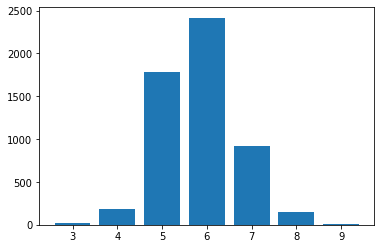

In [46]:
count_and_plot(y)

Class=5, n=1881 (20.000%)
Class=6, n=1881 (20.000%)
Class=7, n=1881 (20.000%)
Class=8, n=1881 (20.000%)
Class=4, n=1881 (20.000%)


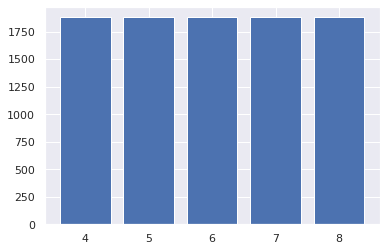

In [ ]:
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [ ]:
# X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, 
#                                                     y_resampled, 
#                                                     test_size=.3,
#                                                     random_state=0)

# X_train, X_val, y_train, y_val = train_test_split(X_trainval, 
#                                                     y_trainval, 
#                                                     test_size=.3,
#                                                     random_state=0)

In [47]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3,
                                                    random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, 
                                                    y_trainval, 
                                                    test_size=.3,
                                                    random_state=0)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVR

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        model = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = model.score(X_val, y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

best_score, best_parameters

(0.6008658008658009, {'C': 1, 'gamma': 1})

In [49]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가
model = SVC(**best_parameters).fit(X_trainval, y_trainval)
model.score(X_trainval, y_trainval), model.score(X_test, y_test)

(0.8908240187158825, 0.62)

In [ ]:
display(white[white.quality == 5].iloc[:, :-1])
len(white[white.quality == 5].iloc[:, :-1])

In [ ]:
model.predict(white[white.quality == 7].iloc[:, 1:])

In [ ]:
from sklearn.svm import SVR

svm_poly_reg=SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(X_train,y_train)

SVR(C=100, degree=2, kernel='poly')

In [ ]:
svm_poly_reg.predict(white[white.quality == 4].iloc[:, 1:])

In [ ]:
from sklearn.metrics import mean_squared_error 
y_pred = svm_poly_reg.predict(X_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

1.0683969601856123

In [ ]:
X, y = white_3.iloc[:, 1:], white_3.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3,
                                                    random_state=0)

print(len(X_train), len(X_test), len(y_train), len(y_test))

2895 1242 2895 1242


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [ ]:
gs.score(X_test, y_test)

0.5909822866344605

In [ ]:
# 원 핫 인코딩 ㄱㄱㄱ
# 와인 색 상관말고 ㄱㄱ